#                                   Feature Engineering Pipeline 



The objective of this Markdown is to provide a pipeline on the process of feature engineering to predict the variable "left"


In [29]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm

from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score, cross_val_predict, ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, RobustScaler, scale, PolynomialFeatures, StandardScaler

from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter('ignore')

# Importing Data  

In [10]:
df_raw = pd.read_csv('/Users/macbook/Desktop/IE_MBD/2nd_Term/Machine_Learning/IndividualAssignment/turnover.csv')

df = df_raw.copy()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Exploring Data

### Distribution of satisfaction level and employee turnover

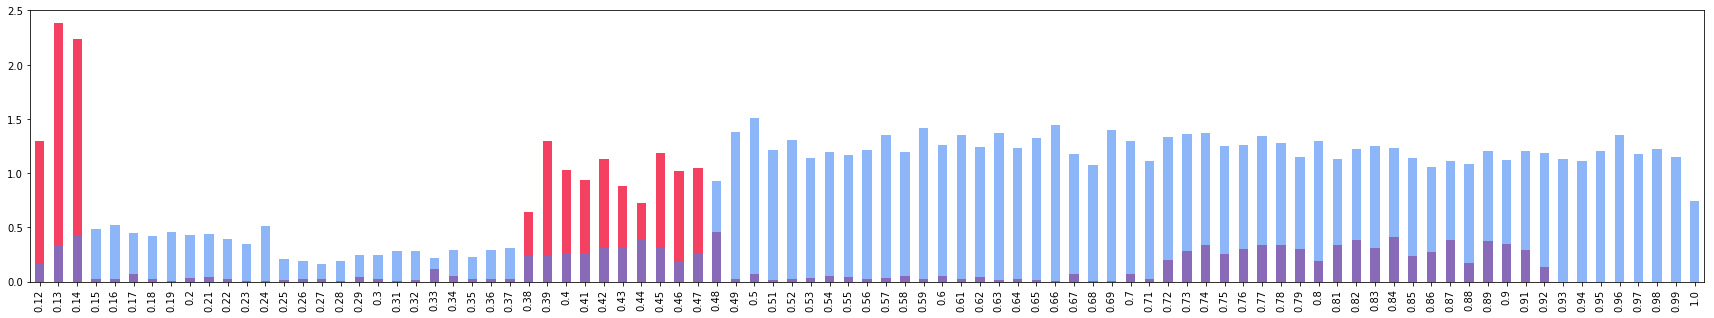

In [11]:
#Graphical Representation of this variable
plt.figure(figsize=(30,5))
((df_raw[df_raw.left==1].satisfaction_level.value_counts().sort_index()/len(df_raw.left))*100).plot(kind='bar',color='#f44162')
((df_raw[df_raw.left==0].satisfaction_level.value_counts().sort_index()/len(df_raw.left))*100).plot(kind='bar',color='#4286f4',alpha=0.6)


### Distribution of evaluation level and employee turnover

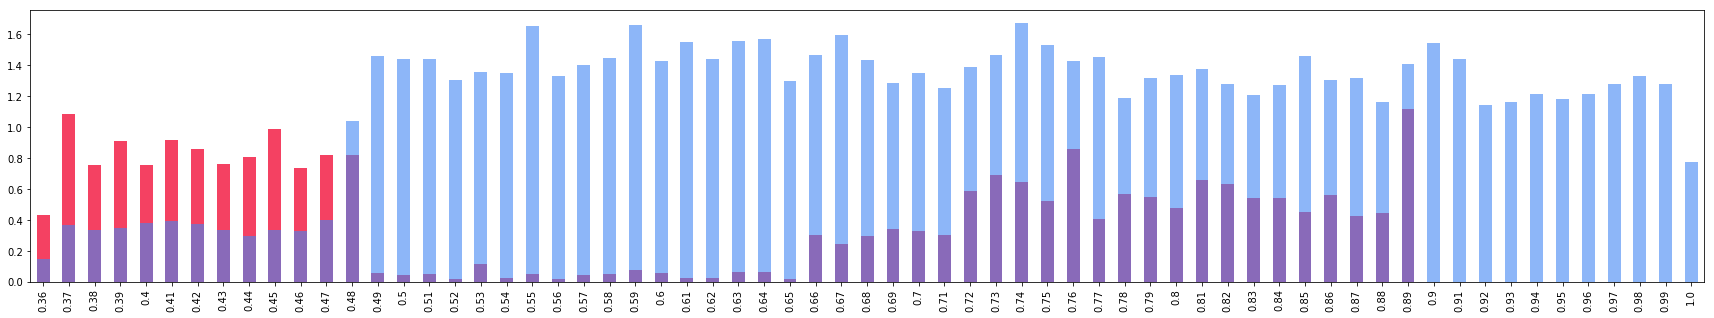

In [12]:

plt.figure(figsize=(30,5))
((df_raw[df_raw.left==1].last_evaluation.value_counts().sort_index()/len(df_raw.left))*100).plot(kind='bar',color='#f44162')
((df_raw[df_raw.left==0].last_evaluation.value_counts().sort_index()/len(df_raw.left))*100).plot(kind='bar',color='#4286f4',alpha=0.6)


### Proportion of employees' tenure and turnover

Proportion of people left vs time spend
2     0.016338
3     0.246159
4     0.348064
5     0.565513
6     0.291086
7          NaN
8          NaN
10         NaN
Name: time_spend_company, dtype: float64


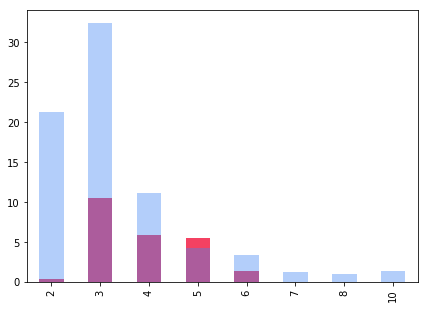

In [13]:
#Try to find out the proportion of employee who left for each level of timeframe 

a = ((df_raw[df_raw.left==1].time_spend_company.value_counts()))
b = ((df_raw[df_raw.left==0].time_spend_company.value_counts()))
print ("Proportion of people left vs time spend")
print (a/(a+b)) 

#Graphical Representation of this variable

plt.figure(figsize=(7,5))
((df_raw[df_raw.left==1].time_spend_company.value_counts().sort_index()/len(df_raw.left))*100).plot(kind='bar',color='#f44162')
((df_raw[df_raw.left==0].time_spend_company.value_counts().sort_index()/len(df_raw.left))*100).plot(kind='bar',color='#4286f4',alpha=0.4)



This show that newly hired and long tenured employees are less likely to quit

### Proportion of employee who left with the number of projects they have

Proportion of people left vs number of project
2    0.656198
3    0.017756
4    0.093700
5    0.221659
6    0.557922
7         NaN
Name: number_project, dtype: float64


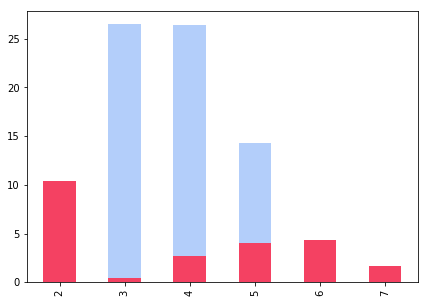

In [14]:

a = ((df_raw[df_raw.left==1].number_project.value_counts()))
b = ((df_raw[df_raw.left==0].number_project.value_counts()))
print ("Proportion of people left vs number of project")
print (a/(a+b)) 

#Graphical Representation of this variable

plt.figure(figsize=(7,5))
((df_raw[df_raw.left==0].number_project.value_counts().sort_index()/len(df_raw.left))*100).plot(kind='bar',color='#4286f4',alpha=0.4)
((df_raw[df_raw.left==1].number_project.value_counts().sort_index()/len(df_raw.left))*100).plot(kind='bar',color='#f44162')


This show that employee with less projects at around 2 is very likely to quit. This is might be because of the lack of motivation while people with high number above 5 of project quit because of stress

### Distribution of work hours and employee turnover

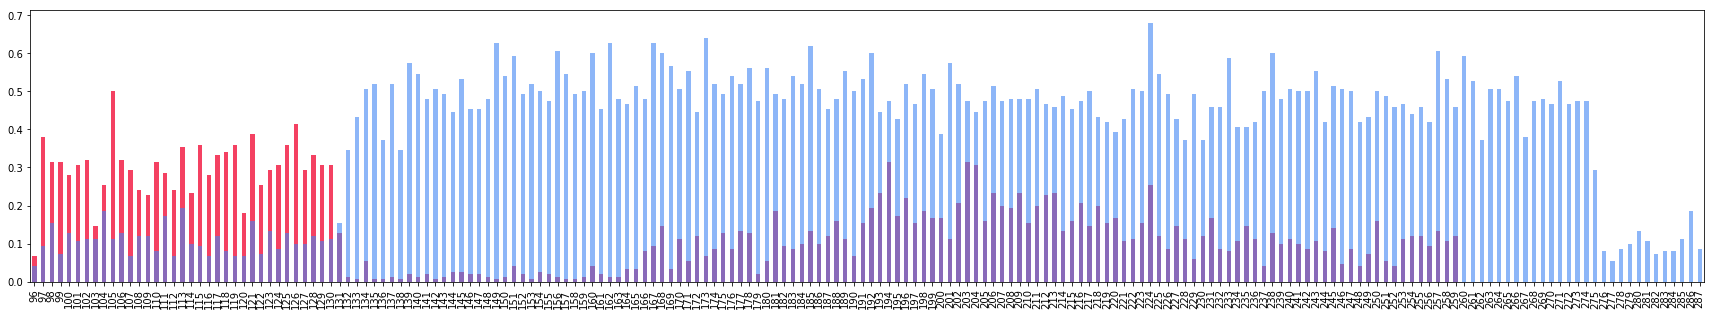

In [15]:

plt.figure(figsize=(30,5))
((df_raw[df_raw.left==1].average_montly_hours.value_counts().sort_index()/len(df_raw.left))*100).plot(kind='bar',color='#f44162')
((df_raw[df_raw.left==0].average_montly_hours.value_counts().sort_index()/len(df_raw.left))*100).plot(kind='bar',color='#4286f4',alpha=0.6)


### Proportion of people left vs division

Proportion of people left vs division
IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing      0.236597
product_mng    0.219512
sales          0.244928
support        0.248991
technical      0.256250
Name: sales, dtype: float64


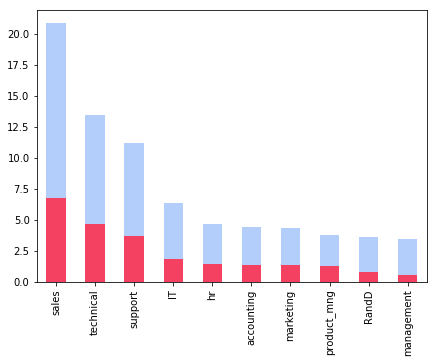

In [16]:
a = ((df_raw[df_raw.left==1].sales.value_counts()))
b = ((df_raw[df_raw.left==0].sales.value_counts()))
print ("Proportion of people left vs division")
print (a/(a+b))

plt.figure(figsize=(7,5))
((df_raw[df_raw.left==0].sales.value_counts()/len(df_raw.left))*100).plot(kind='bar',color='#4286f4',alpha=0.4)
((df_raw[df_raw.left==1].sales.value_counts()/len(df_raw.left))*100).plot(kind='bar',color='#f44162')




In [17]:
a = ((df_raw[df_raw.left==1].salary.value_counts()))
b = ((df_raw[df_raw.left==0].salary.value_counts()))
print ("Proportion of people left vs division")
print (a/(a+b))

Proportion of people left vs division
low       0.296884
medium    0.204313
high      0.066289
Name: salary, dtype: float64


# 1. Building Base Line Model 

### 1.1 Integer encoding on categorical variable “salaries”

In [18]:
df["salary"] = df["salary"].astype('category').cat.reorder_categories(['low', 'medium', 'high']).cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null int8
dtypes: float64(2), int64(6), int8(1), object(1)
memory usage: 1.0+ MB


### 1.2 Converting promotion_last_5years & Work_accident into boolean

In [19]:
df["Work_accident"] = df["Work_accident"].astype('uint8')
df["promotion_last_5years"] = df["promotion_last_5years"].astype('uint8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null uint8
left                     14999 non-null int64
promotion_last_5years    14999 non-null uint8
sales                    14999 non-null object
salary                   14999 non-null int8
dtypes: float64(2), int64(4), int8(1), object(1), uint8(2)
memory usage: 864.3+ KB


### 1.3 One Hot Encoding categorical variables "sales" 

In [20]:
# One Hot Encoding 

department = pd.get_dummies(df["sales"])
department.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [21]:
df = df.drop(["sales"], axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0


In [22]:
df = df.join(department)
y = df.loc[:, 'left']
df.drop('left', inplace=True, axis=1)

### 1.4 Check & Fix Skewness 

In [23]:
def feature_skewness(df):
    numeric_dtypes = ['int16', 'int32', 'int64', 
                      'float16', 'float32', 'float64']
    numeric_features = []
    for i in df.columns:
        if df[i].dtype in numeric_dtypes: 
            numeric_features.append(i)

    feature_skew = df[numeric_features].apply(
        lambda x: skew(x)).sort_values(ascending=False)
    skews = pd.DataFrame({'skew':feature_skew})
    return feature_skew, numeric_features


def fix_skewness(df):
    feature_skew, numeric_features = feature_skewness(df)
    high_skew = feature_skew[feature_skew > 2]
    skew_index = high_skew.index
    
    for i in skew_index:
        df[i] = boxcox1p(df[i], boxcox_normmax(df[i]+1))

    skew_features = df[numeric_features].apply(
        lambda x: skew(x)).sort_values(ascending=False)
    skews = pd.DataFrame({'skew':skew_features})
    return df

feature_skewness(df)

(time_spend_company      1.853134
 number_project          0.337672
 average_montly_hours    0.052837
 last_evaluation        -0.026619
 satisfaction_level     -0.476313
 dtype: float64,
 ['satisfaction_level',
  'last_evaluation',
  'number_project',
  'average_montly_hours',
  'time_spend_company'])

### 1.5 Correlation Matrix

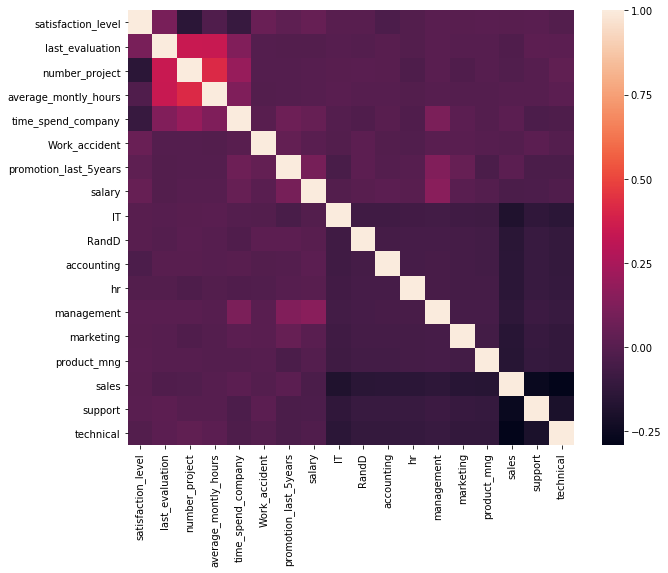

In [24]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr()) 

### 1.6 Feature Reduction using Recursive Feature Elimination 

In [25]:

features = list(df)

X = df.loc[:, features]

logreg = LogisticRegression(solver='lbfgs', max_iter=250)
rfe = RFE(logreg, 18)
rfe = rfe.fit(X, y)

print('Selected features: {}'.format(list(df.loc[:, rfe.support_])))

Selected features: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary', 'IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical']


#### 1.6.1 Build the model with selected values 


In [26]:
df_X = df.loc[:, list(df.loc[:, rfe.support_])]

logit_model=sm.Logit(y, df_X)
result=logit_model.fit(method='bfgs')
print(result.summary2())

         Current function value: 0.430547
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.216     
Dependent Variable:    left              AIC:               12951.5489
Date:                  2019-02-17 16:59  BIC:               13088.6322
No. Observations:      14999             Log-Likelihood:    -6457.8   
Df Model:              17                LL-Null:           -8232.3   
Df Residuals:          14981             LLR p-value:       0.0000    
Converged:             0.0000            Scale:             1.0000    
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
satisfaction_level    -4.0323   0.0977 -41.2664 0.0000 -4.2238 -3.8408
last_evaluation        0.7870   0.1492   5

#### 1.6.2 Drop variables of high p values

In [27]:

to_remove = result.pvalues[result.pvalues > 0.05].index.tolist()
df_X.drop(to_remove, inplace=True, axis=1)

logit_model=sm.Logit(y, df_X)
result=logit_model.fit(method='bfgs')
print(result.summary2())

         Current function value: 0.430591
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.215     
Dependent Variable:    left              AIC:               12942.8632
Date:                  2019-02-17 16:59  BIC:               13041.8678
No. Observations:      14999             Log-Likelihood:    -6458.4   
Df Model:              12                LL-Null:           -8232.3   
Df Residuals:          14986             LLR p-value:       0.0000    
Converged:             0.0000            Scale:             1.0000    
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
satisfaction_level    -4.0055   0.0911 -43.9614 0.0000 -4.1841 -3.8269
last_evaluation        0.8899   0.1403   6

# 2. Evaluate Base Model

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.8, random_state=100)

lr = LogisticRegression(penalty='l2',C = 0.5)
lr.fit(X_train,y_train)
pred=lr.predict(X_test)



print(classification_report(y_test, pred))
print("Accuracy Score is: {:.3f}".format(accuracy_score(y_test, pred)))
print("AUC Score is: {:.3f}".format(roc_auc_score(y_test, pred)))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      9128
           1       0.62      0.36      0.45      2872

   micro avg       0.79      0.79      0.79     12000
   macro avg       0.72      0.64      0.66     12000
weighted avg       0.77      0.79      0.77     12000

Accuracy Score is: 0.794
AUC Score is: 0.644


## 2.1 Cross Validate Base Model

In [363]:
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.20, random_state=100)

cv = ShuffleSplit(n_splits = 10, test_size=0.2, random_state=100)

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=cv)

print('Obtained {} positive Accurary scores'.format(len(scores[scores > 0.0])))
print('Best Validation Accuracy: {:.3f}'.format(max(scores)))
print('Avg. Validation Accuracy: {:.3f}'.format(np.mean(scores[scores > 0.0])))

Obtained 10 positive Accurary scores
Best Validation Accuracy: 0.798
Avg. Validation Accuracy: 0.790


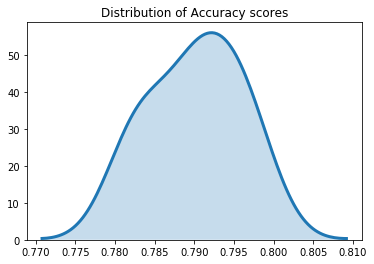

In [364]:
sns.distplot(scores[scores > 0.0], hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3});
plt.title('Distribution of Accuracy scores')
plt.show();

## 2.2 Evaluate Base Model with Polynomial Features

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.20, random_state=100)

cv = ShuffleSplit(n_splits = 10, test_size=0.2, random_state=100)

from sklearn.pipeline import Pipeline, make_pipeline

pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False), 
    LogisticRegression(n_jobs=-1)).fit(X_train, y_train)

scores = cross_val_score(pipeline, X_train, y_train,
                         scoring="accuracy", cv=cv)

print('Obtained {} positive Accuracy scores'.format(len(scores[scores > 0.0])))
print('Best CV Accuracy: {:.2f}'.format(max(scores)))
print('Avg. CV Accuracy: {:.2f} +/- {:.02}'.format(
    np.mean(scores[scores > 0.0]),
    np.std(scores[scores > 0.0])))
print('Accuracy in hold-out dataset: {:.2f}'.format(
    pipeline.score(X_test, y_test)))

Obtained 10 positive Accuracy scores
Best CV Accuracy: 0.86
Avg. CV Accuracy: 0.84 +/- 0.015
Accuracy in hold-out dataset: 0.83


# 3. Feature Engineering

## 3.1 Binning & One Hot Enconding “Satisfaction Level”

In [50]:
df_new = df_X.copy()

bins = [0, 0.12, 0.35, 0.46, 0.92,1.0]
df_new['satisfaction_level_bin'] = pd.cut(df_new.satisfaction_level,bins)

df_new = pd.concat([df_new, pd.get_dummies(df_new['satisfaction_level_bin'],prefix='Satisfaction', prefix_sep='_')], axis=1)
df_new.drop('satisfaction_level', inplace=True, axis=1)
df_new.drop('satisfaction_level_bin', inplace=True, axis=1)

# Evaluate the accuracy of this new feature 

X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.20, random_state=101)
lr = LogisticRegression(penalty='l2',C=0.50)
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
score = accuracy_score(y_test, pred)
print("New Accuracy Score is: {:.2f}".format(score))


New Accuracy Score is: 0.88


## 3.2 Binning & One Hot Enconding “Last Evaluation”

In [51]:
#Create different performance level base on percentile --> Cateforized by by low, below average, above average, high

bins = [0, 0.48, 0.66, 0.9, 1.0]
df_new['evaluation_bin'] = pd.cut(df_new.last_evaluation,bins);
df_new = pd.concat([df_new, pd.get_dummies(df_new['evaluation_bin'],prefix='Evaluation', prefix_sep='_')], axis=1)

df_new.drop('last_evaluation', inplace=True, axis=1)
df_new.drop('evaluation_bin', inplace=True, axis=1)

# Evaluate the accuracy of this new feature 

X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.20, random_state=101)
lr = LogisticRegression(penalty='l2',C=0.50)
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
score = accuracy_score(y_test, pred)
print("New Accuracy Score is: {:.2f}".format(score))


New Accuracy Score is: 0.90


## 3.4.1 One Hot Encoding “time_spend_company” 

In [52]:
#Make year of work as dummy variable assuming newly employed and long term employees are less likely to quit
df_new = pd.concat([df_new, pd.get_dummies(df_new["time_spend_company"],prefix='time', prefix_sep='_')], axis=1)

df_new.drop('time_spend_company', inplace=True, axis=1)

# Evaluate the accuracy of this new feature 

X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.20, random_state=101)
lr = LogisticRegression(penalty='l2',C=0.50)
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
score = accuracy_score(y_test, pred)
print("New Accuracy Score is: {:.3f}".format(score))

New Accuracy Score is: 0.939


## 3.4.2  One Hot Encoding “number_project” 

In [53]:

#Make number of project as dummy variable assuming people with less project is more likely to quit due to the lack 
#of motivation. Similar to people with high project due to the stress level. 
df_new = pd.concat([df_new, pd.get_dummies(df_new["number_project"],prefix='#project', prefix_sep='_')], axis=1)
df_new.drop('number_project', inplace=True, axis=1)

# Evaluate the accuracy of this new feature 
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.20, random_state=101)
lr = LogisticRegression(penalty='l2',C=0.50)
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
score = accuracy_score(y_test, pred)
print("New Accuracy Score is: {:.3f}".format(score))

New Accuracy Score is: 0.945


## 3.5 Binning & One Hot Enconding “Monthly_hours”

In [54]:
bins = [0, 131, 165, 178, 179, 259, 287]
df_new['average_montly_hours_bin'] = pd.cut(df_new.average_montly_hours,bins)

df_new = pd.concat([df_new, pd.get_dummies(df_new['average_montly_hours_bin'],prefix='am', prefix_sep='_')], axis=1)
df_new.drop('average_montly_hours_bin', inplace=True, axis=1)
df_new.drop('average_montly_hours', inplace=True, axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.20, random_state=101)
lr = LogisticRegression(penalty='l2',C=0.50)
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
score = accuracy_score(y_test, pred)
print("New Accuracy Score is: {:.3f}".format(score))

New Accuracy Score is: 0.947


### Correlation Analysis

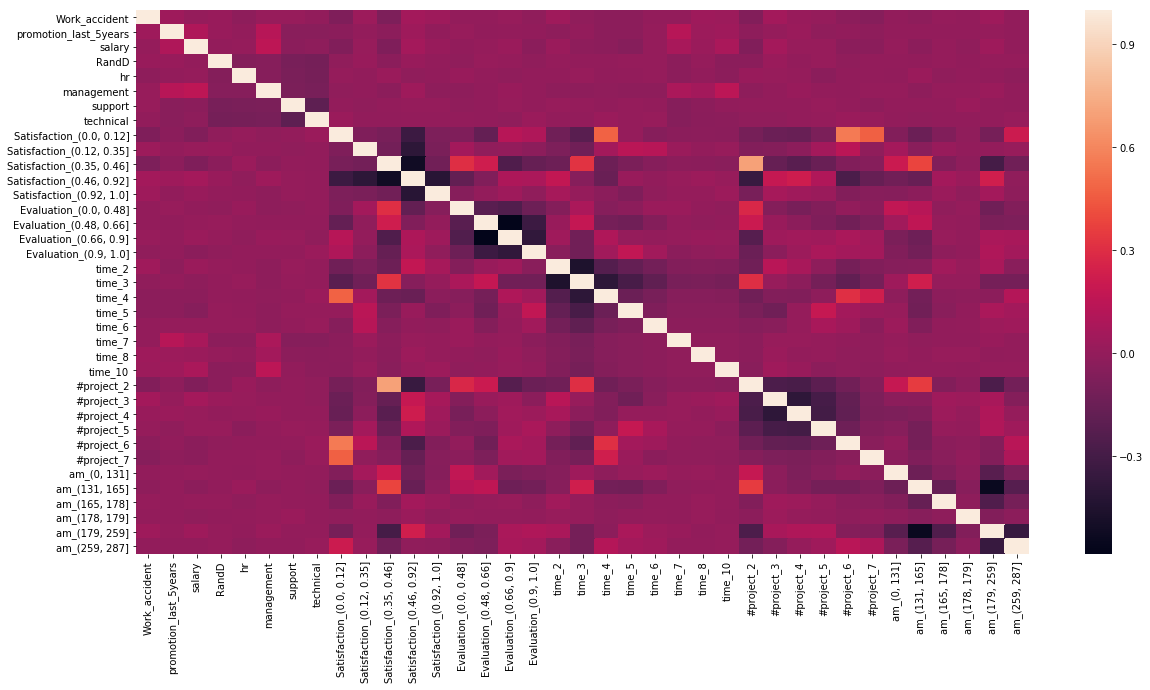

In [55]:
plt.figure(figsize = (20,10))
sns.heatmap(df_new.corr())

In [56]:

X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.20, random_state=101)

lr = LogisticRegression(penalty='l2',C=0.50)
lr.fit(X_train,y_train)
pred=lr.predict(X_test)


print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2262
           1       0.90      0.89      0.89       738

   micro avg       0.95      0.95      0.95      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000



## Cross Validate New Model

Obtained 10 positive Accurary scores
Best Validation Accuracy: 0.95
Avg. Validation Accuracy: 0.95


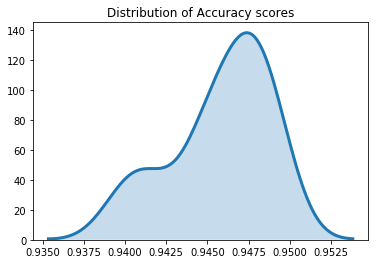

In [57]:
# Test the new model using cross validation

X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.20, random_state=100)

cv = ShuffleSplit(n_splits = 10, test_size=0.2, random_state=100)

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=cv)

print('Obtained {} positive Accurary scores'.format(len(scores[scores > 0.0])))
print('Best Validation Accuracy: {:.2f}'.format(max(scores)))
print('Avg. Validation Accuracy: {:.2f}'.format(np.mean(scores[scores > 0.0])))

sns.distplot(scores[scores > 0.0], hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3});
plt.title('Distribution of Accuracy scores')
plt.show();

## Evaluate New Model with Polynomial Features 

In [67]:
## Test model taking into account Polynomial Features
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.20, random_state=100)

cv = ShuffleSplit(n_splits = 10, test_size=0.2, random_state=100)

pipeline = Pipeline([
    ('polynomials', PolynomialFeatures(degree=2, include_bias=False)), 
    ('logistic_regression', LogisticRegression(max_iter = 10000, n_jobs=-1))])
pipeline.fit(X_train, y_train)
training_score = pipeline.score(X_test, y_test)
print('Accuracy from entire-dataset estimator: {:.2f}'.format(training_score))

# Obtain scores and estimators from different splits and use the best one.
scores = cross_validate(pipeline, 
                        X_train, y_train,
                        scoring=['accuracy'], 
                        cv=cv,
                        return_estimator=True)
split_scores = [scores['estimator'][i].score(X_test, y_test) 
                for i in range(len(scores))]
index_best = split_scores.index(max(split_scores))
print('Best estimator Accuracy score: {:.2f}'.format(split_scores[index_best]))


## There is high risk of overfitting 

Accuracy from entire-dataset estimator: 0.98
Best estimator Accuracy score: 0.98


## Dimensionality Reduction with PCA 

In [59]:
from sklearn.preprocessing import StandardScaler

df_PCA= StandardScaler().fit_transform(df_new)

X_train, X_test, y_train, y_test = train_test_split(df_PCA, y, test_size = 0.20, random_state=100)

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [66]:
#Dimensionality Reduction

pca_new = pd.DataFrame(pca.components_.T, columns=['PC' + str(i) for i in range(1, 3) ], index=df_new.columns)
pca_new= pca_new.abs()
pca_new['lin_influ'] = pca_new.sum(axis=1)

X_train, X_test, y_train, y_test = train_test_split(PolynomialFeatures(degree=2, include_bias=False).fit_transform(df_new[pca_new.lin_influ.nlargest(25).index].as_matrix()), 
                                                    y, test_size=0.30, random_state=101)
lr = LogisticRegression(penalty='l2',C=0.6)
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

score = accuracy_score(y_test, pred)
print("Accuracy Score is: {:.2f}".format(score))



Accuracy Score is: 0.97


## Outlier Test

In [65]:
def remove_outliers(df):
    ols = sm.OLS(endog = y, exog = df_new)
    fit = ols.fit()
    test = fit.outlier_test()['bonf(p)']
    outliers = list(test[test<1e-3].index) 
    return outliers

remove_outliers(df_new)

[]